# **Extract reviews of any product from ecommerce website like amazon and Perform emotion mining**

In [19]:
import nltk
import requests
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16,4)
plt.rcParams['figure.dpi'] = 350
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 5600x1400 with 0 Axes>

# Performing Web Scraping
Adding Header And Funtion

In [20]:
headers = { 'authority': 'www.amazon.in',
            'accept-language': 'en-US,en;q=0.9',
            'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [21]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = bs(r.text, 'html.parser')
    return soup

In [22]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {  'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                        'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                        'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                        'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

# Looping In URL

In [23]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/Redgear-Cloak-Gaming-Headphones-Microphone/product-reviews/B07T9FV9YP/ref=cm_cr_getr_d_paging_btm_next_22?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

# Creating Dataframe With Reviewlist

In [24]:
rg = pd.DataFrame(reviewlist)

rg

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nbudget friendly..,4.0,if u want headphone just for completing and us...,Reviewed in India on 11 September 2023
1,4.0 out of 5 stars\nRedgear Cloak Gaming Headp...,4.0,I recently purchased the Redgear Cloak Wired R...,Reviewed in India on 22 July 2023
2,"4.0 out of 5 stars\nIm not a paid reviewer,or ...",4.0,I ordered it at 16.7.23 and hands on at 19.7.2...,Reviewed in India on 19 July 2023
3,3.0 out of 5 stars\nJust okay not too good,3.0,So almost after using 2 year I saying that thi...,Reviewed in India on 7 September 2023
4,4.0 out of 5 stars\nGood ? or Best ?,4.0,Good HeadPhones For Budget Gaming ( PC ) And C...,Reviewed in India on 11 August 2023
...,...,...,...,...
105,3.0 out of 5 stars\nAttractive piece with some...,3.0,My review after 3 months of extensive use:I pu...,Reviewed in India on 30 April 2023
106,4.0 out of 5 stars\nValue for money,4.0,Very good product but the wire length is too l...,Reviewed in India on 28 May 2023
107,3.0 out of 5 stars\nGood Product,3.0,At this price it’s worth to buy,Reviewed in India on 13 July 2023
108,5.0 out of 5 stars\nBest Gaming headphones at ...,5.0,First of all i like the pice of this product. ...,Reviewed in India on 25 July 2023


In [25]:
rg["Review_Date"] = rg["Review_Date"].replace('Reviewed in India on','', regex=True)
rg['Review_Date'] = pd.to_datetime(rg['Review_Date'])

rg

,Title,Rating,Review,Review_Date
0,4.0 out of 5 stars\nbudget friendly..,4.0,if u want headphone just for completing and us...,2023-09-11
1,4.0 out of 5 stars\nRedgear Cloak Gaming Headp...,4.0,I recently purchased the Redgear Cloak Wired R...,2023-07-22
2,"4.0 out of 5 stars\nIm not a paid reviewer,or ...",4.0,I ordered it at 16.7.23 and hands on at 19.7.2...,2023-07-19
3,3.0 out of 5 stars\nJust okay not too good,3.0,So almost after using 2 year I saying that thi...,2023-09-07
4,4.0 out of 5 stars\nGood ? or Best ?,4.0,Good HeadPhones For Budget Gaming ( PC ) And C...,2023-08-11
...,...,...,...,...
105,3.0 out of 5 stars\nAttractive piece with some...,3.0,My review after 3 months of extensive use:I pu...,2023-04-30
106,4.0 out of 5 stars\nValue for money,4.0,Very good product but the wire length is too l...,2023-05-28
107,3.0 out of 5 stars\nGood Product,3.0,At this price it’s worth to buy,2023-07-13
108,5.0 out of 5 stars\nBest Gaming headphones at ...,5.0,First of all i like the pice of this product. ...,2023-07-25


# Performing EDA In Dataset
Visualizing The Data

In [26]:
ts = rg[['Rating','Review_Date']]
ts.set_index('Review_Date', inplace=True)

ts.head()

,Rating
Review_Date,
2023-09-11,4.0
2023-07-22,4.0
2023-07-19,4.0
2023-09-07,3.0
2023-08-11,4.0


# Ploting Barplot

Text(0, 0.5, 'Count')

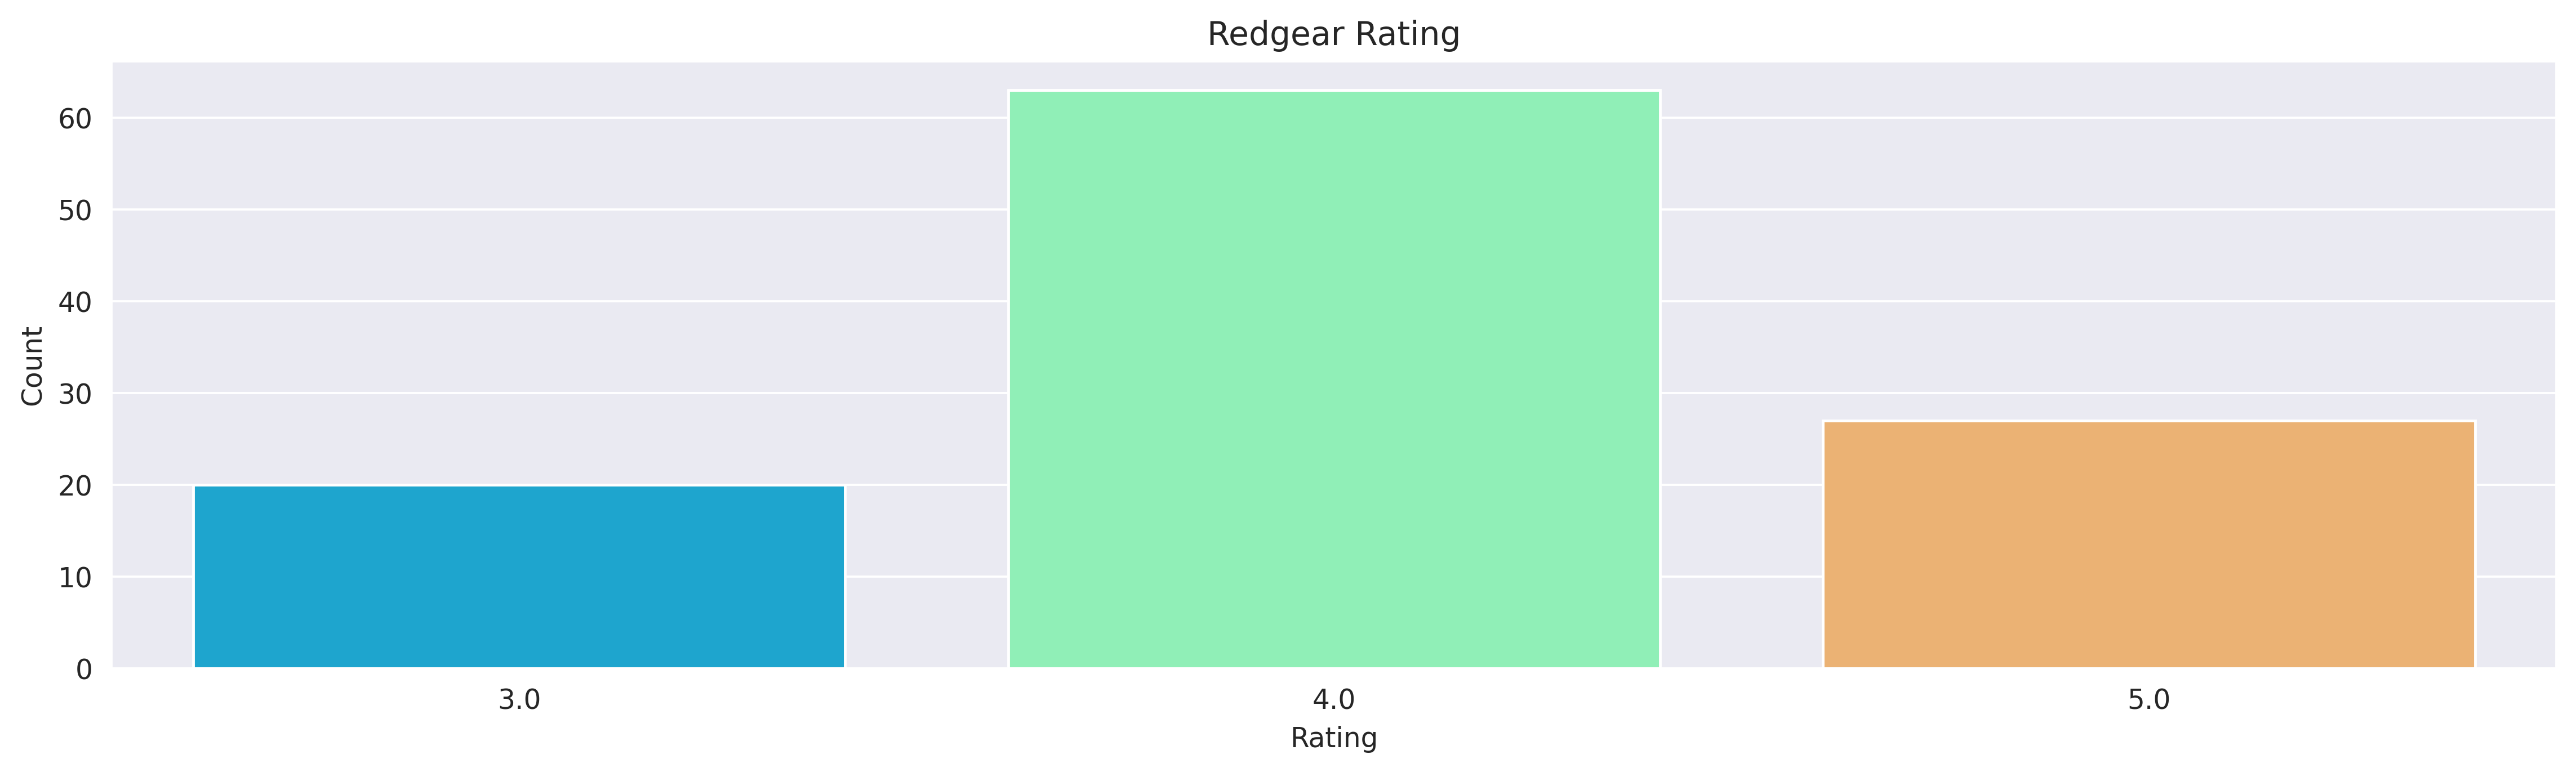

In [27]:
plt.title('Redgear Rating')
sns.barplot(x=ts['Rating'].value_counts().index,y= ts['Rating'].value_counts().values, palette = 'rainbow')
plt.xlabel('Rating')
plt.ylabel('Count')

<Axes: ylabel='Rating'>

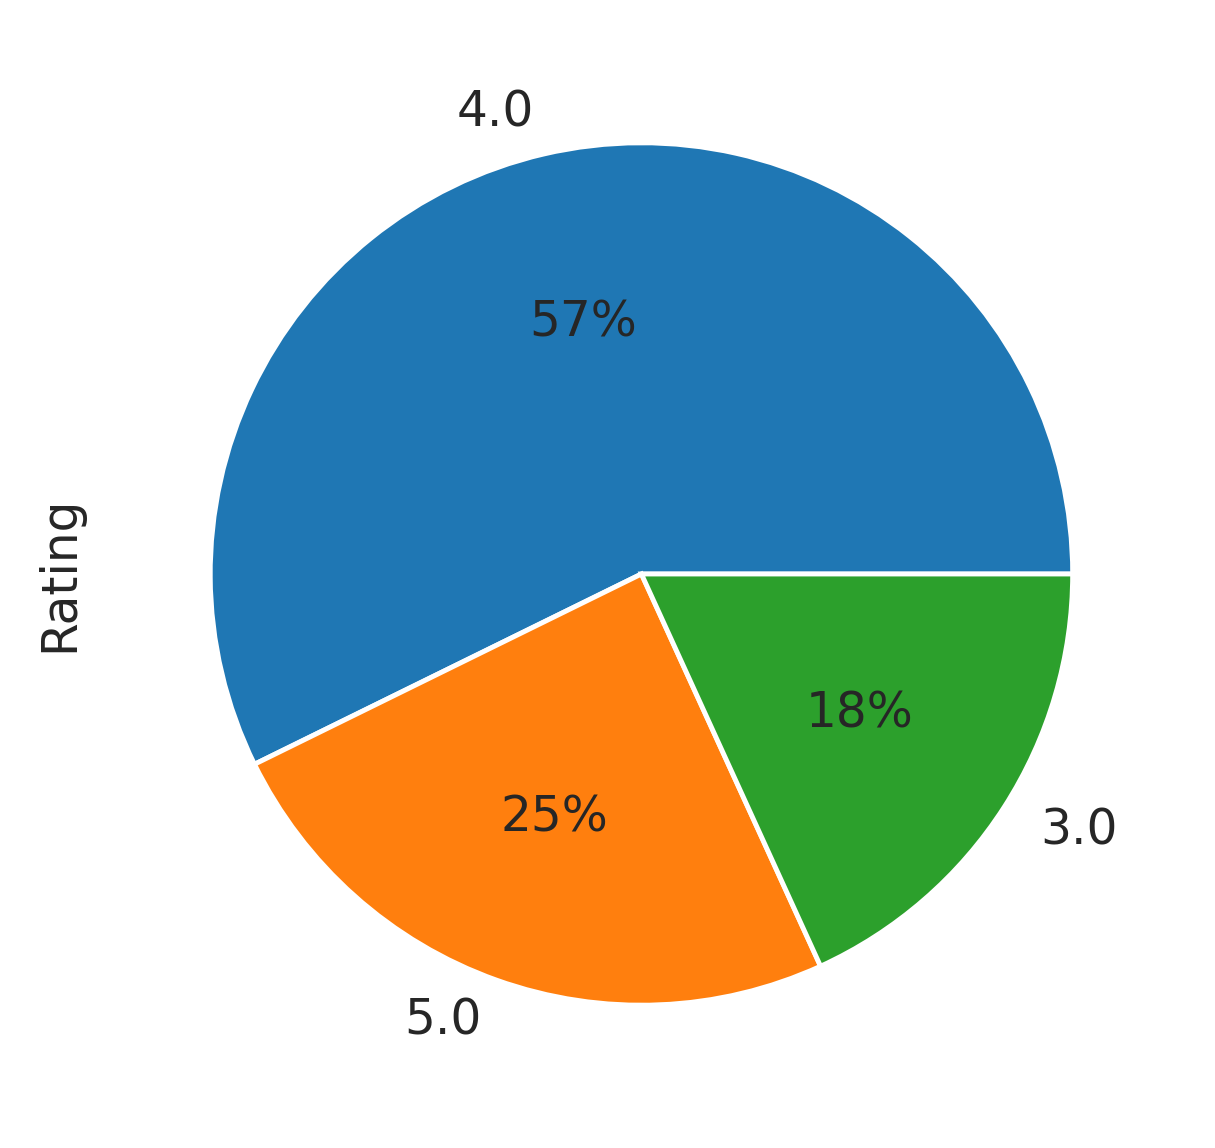

In [28]:
ts['Rating'].value_counts().plot(kind='pie',autopct='%1.00f%%')

# Ploting Lineplot

<Axes: xlabel='Review_Date'>

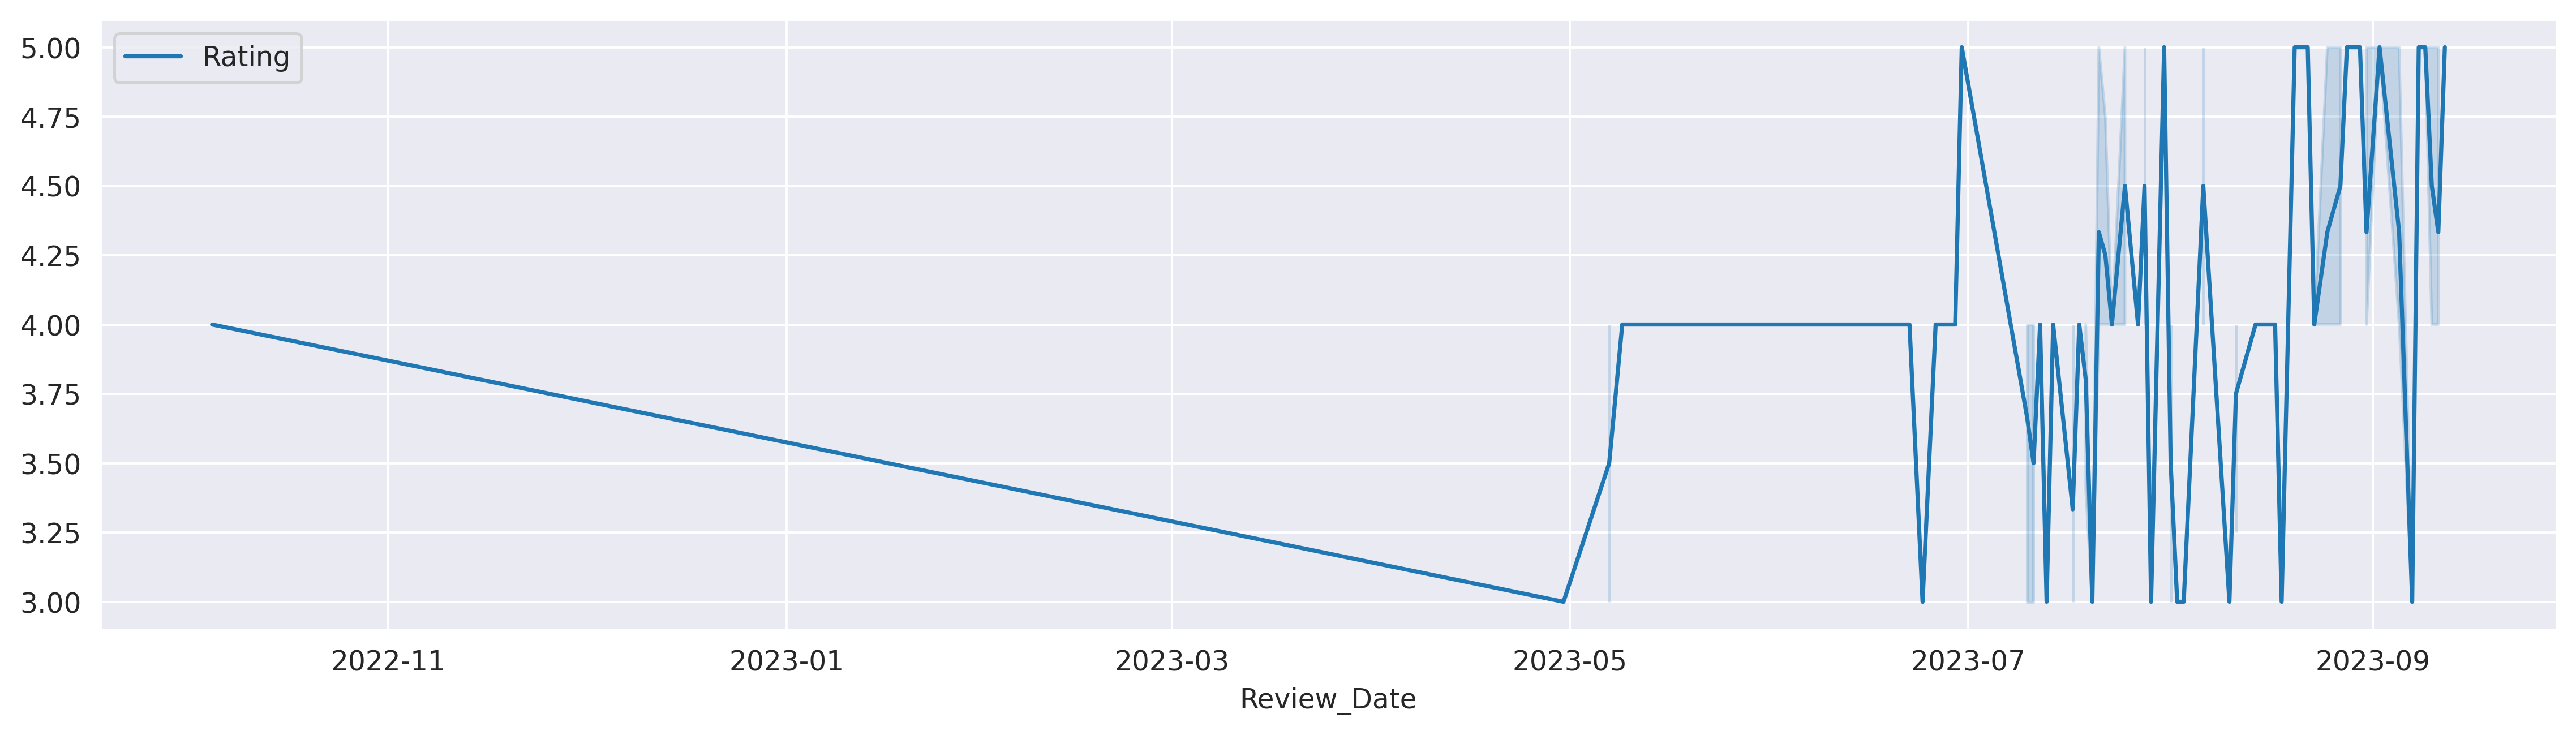

In [29]:
sns.lineplot(ts)

# Applying Lemmatization And Removing Stopword

In [30]:
def corpu(em, Text):
    lemma = WordNetLemmatizer()

    corpus = []

    for i in range(len(em)):
        msg = re.sub('[^a-zA-Z]',' ',em[Text][i])
        msg = msg.lower()
        msg = msg.split()

        msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')]
        msg = ' '.join(msg)
        corpus.append(msg)

    return corpus

In [36]:
import nltk
nltk.download('wordnet')
nltk.download()

[nltk_data] Downloading package wordnet to /root/nltk_data...


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [37]:
corpus = corpu(rg, 'Review')

corpus

['u want headphone completing using daily rough use doest matter quality go u want quality u r welcome product gud cushion gud u problem starting like pain head ear ot take month think ur headset adjust ur head u large head wont recomend sweat lot even normal temp sometimes u idk happens headband stretchable yea afraid breaking metalwont recomend fps game casual would recomend use quality boost software like fx setup nice software comfort max hr hr also people pain start take min break mic bro dont greedy u want one word ok ok',
 'recently purchased redgear cloak wired rgb ear gaming headphone mic affordable price putting test gaming session honest review feature redgear cloak boast impressive feature including mm audio driver promise immersive sound quality omnidirectional microphone handy clear communication teammate added rgb light give headphone cool attractive look build quality appears solid durable instilling confidence withstand rough handling pro rgb light add stylish vibrant 

# Performing Word Tokenize

In [38]:
def word_tok(corpus):
    word = []

    for i in corpus:
        words = word_tokenize(i)
        word.append(words)

    return word

In [40]:
nltk.download('punkt')
word = word_tok(corpus)

word

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[['u',
  'want',
  'headphone',
  'completing',
  'using',
  'daily',
  'rough',
  'use',
  'doest',
  'matter',
  'quality',
  'go',
  'u',
  'want',
  'quality',
  'u',
  'r',
  'welcome',
  'product',
  'gud',
  'cushion',
  'gud',
  'u',
  'problem',
  'starting',
  'like',
  'pain',
  'head',
  'ear',
  'ot',
  'take',
  'month',
  'think',
  'ur',
  'headset',
  'adjust',
  'ur',
  'head',
  'u',
  'large',
  'head',
  'wont',
  'recomend',
  'sweat',
  'lot',
  'even',
  'normal',
  'temp',
  'sometimes',
  'u',
  'idk',
  'happens',
  'headband',
  'stretchable',
  'yea',
  'afraid',
  'breaking',
  'metalwont',
  'recomend',
  'fps',
  'game',
  'casual',
  'would',
  'recomend',
  'use',
  'quality',
  'boost',
  'software',
  'like',
  'fx',
  'setup',
  'nice',
  'software',
  'comfort',
  'max',
  'hr',
  'hr',
  'also',
  'people',
  'pain',
  'start',
  'take',
  'min',
  'break',
  'mic',
  'bro',
  'dont',
  'greedy',
  'u',
  'want',
  'one',
  'word',
  'ok',
  'ok']

# Creating Word Cloud

In [41]:
def worldcloud(data):
    txt = ' '.join(data)
    stop = STOPWORDS

    wc = WordCloud(background_color='white',stopwords=stop).generate(txt)
    plt.imshow(wc)
    plt.axis('off')
    plt.title('worldcloud',size = 50)

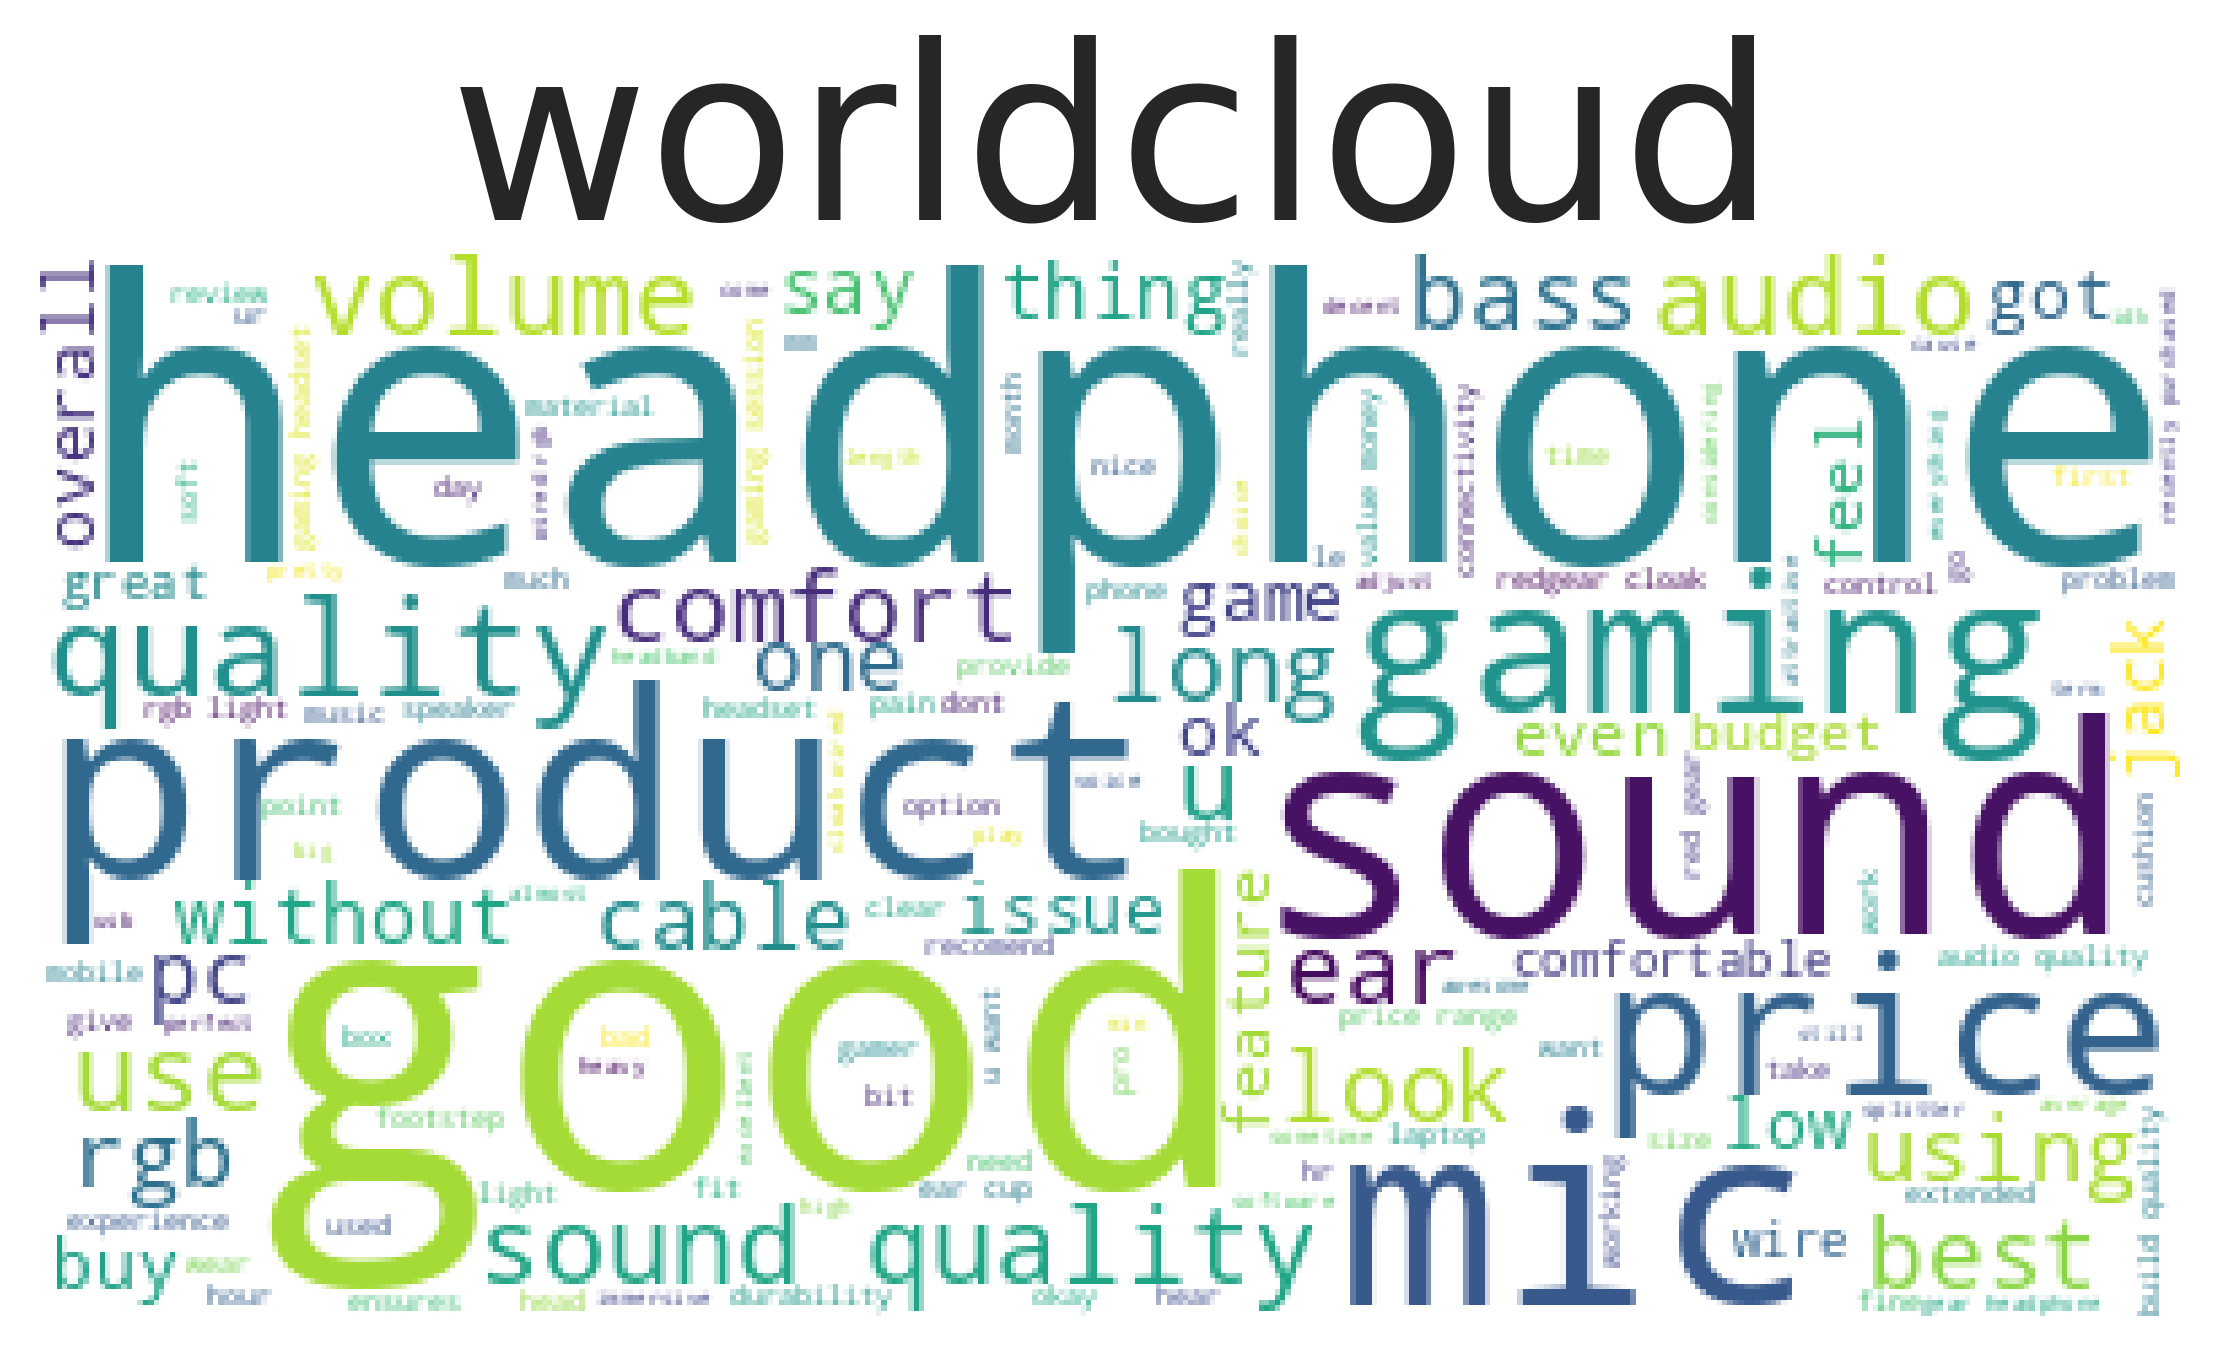

In [42]:
worldcloud(corpus)

# **Performing Data Preprocesing**
Creating Bag Of Word's

In [43]:
cv = CountVectorizer()

x = cv.fit_transform(corpus)
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [44]:
cv.get_feature_names_out()

array(['able', 'absolutely', 'acceptable', 'according', 'acctually',
       'accuracy', 'accurate', 'actually', 'add', 'added', 'additional',
       'adjust', 'adjustable', 'adjusting', 'affecting', 'affordable',
       'afraid', 'ago', 'allign', 'allowing', 'allows', 'almost', 'also',
       'although', 'amazing', 'amazon', 'amplifier', 'amzon', 'anazon',
       'ant', 'anyone', 'anything', 'anythingrgb', 'appearance',
       'appears', 'apply', 'appreciate', 'around', 'assumed',
       'attractive', 'audible', 'audience', 'audio', 'audiobalance',
       'audiophiles', 'august', 'average', 'averagemic', 'avg', 'awesome',
       'awsome', 'back', 'background', 'bad', 'balanced', 'bang', 'bar',
       'base', 'basic', 'bass', 'battery', 'becomes', 'beginner', 'bend',
       'best', 'better', 'betyer', 'bgmi', 'big', 'bit', 'bite', 'block',
       'bluetooth', 'boast', 'boat', 'boatrockers', 'boom', 'boost',
       'boosted', 'bought', 'box', 'bracket', 'braided', 'branding',
       'bre

In [45]:
bow = pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())

bow


,able,absolutely,acceptable,according,acctually,accuracy,accurate,actually,add,added,...,world,worse,worth,would,writing,yea,yeah,year,youtuber,yr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# **Creating Tf-Idf**

In [46]:
tf = TfidfVectorizer()

x_tf = tf.fit_transform(corpus)

x_tf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.0689842 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.09176014],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09918398, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [47]:
tf.get_feature_names_out()

array(['able', 'absolutely', 'acceptable', 'according', 'acctually',
       'accuracy', 'accurate', 'actually', 'add', 'added', 'additional',
       'adjust', 'adjustable', 'adjusting', 'affecting', 'affordable',
       'afraid', 'ago', 'allign', 'allowing', 'allows', 'almost', 'also',
       'although', 'amazing', 'amazon', 'amplifier', 'amzon', 'anazon',
       'ant', 'anyone', 'anything', 'anythingrgb', 'appearance',
       'appears', 'apply', 'appreciate', 'around', 'assumed',
       'attractive', 'audible', 'audience', 'audio', 'audiobalance',
       'audiophiles', 'august', 'average', 'averagemic', 'avg', 'awesome',
       'awsome', 'back', 'background', 'bad', 'balanced', 'bang', 'bar',
       'base', 'basic', 'bass', 'battery', 'becomes', 'beginner', 'bend',
       'best', 'better', 'betyer', 'bgmi', 'big', 'bit', 'bite', 'block',
       'bluetooth', 'boast', 'boat', 'boatrockers', 'boom', 'boost',
       'boosted', 'bought', 'box', 'bracket', 'braided', 'branding',
       'bre

In [48]:
tf_idf = pd.DataFrame(x_tf.toarray(), columns=tf.get_feature_names_out())

tf_idf

,able,absolutely,acceptable,according,acctually,accuracy,accurate,actually,add,added,...,world,worse,worth,would,writing,yea,yeah,year,youtuber,yr
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,...,0.0,0.0,0.000000,0.082975,0.0,0.105394,0.00000,0.000000,0.0,0.00000
1,0.000000,0.0,0.068984,0.0,0.0,0.0,0.0,0.000000,0.06468,0.06468,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.00000
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.086035,0.00000,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.09176,0.000000,0.0,0.09176
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.103923,0.0,0.00000
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.00000
106,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.00000
107,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,...,0.0,0.0,0.711259,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.00000
108,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,...,0.0,0.0,0.000000,0.173937,0.0,0.000000,0.00000,0.000000,0.0,0.00000


# **Perform Sentimental Analysis**

In [49]:
df_corpus = pd.DataFrame(corpus, columns= ['txt'])

df_corpus

,txt
0,u want headphone completing using daily rough ...
1,recently purchased redgear cloak wired rgb ear...
2,ordered hand actually purpose wasnt totally ga...
3,almost using year saying bad okay want buy hea...
4,good headphone budget gaming pc cable bad qual...
...,...
105,review month extensive use purchased casual us...
106,good product wire length long sometimes get messy
107,price worth buy
108,first like pice product want say best gaming h...


In [50]:
df_corpus['sentiment']=df_corpus['txt'].apply(lambda x : TextBlob(x).sentiment.polarity)

df_corpus

,txt,sentiment
0,u want headphone completing using daily rough ...,0.097024
1,recently purchased redgear cloak wired rgb ear...,0.253869
2,ordered hand actually purpose wasnt totally ga...,0.260784
3,almost using year saying bad okay want buy hea...,0.200233
4,good headphone budget gaming pc cable bad qual...,0.129630
...,...,...
105,review month extensive use purchased casual us...,0.140152
106,good product wire length long sometimes get messy,0.150000
107,price worth buy,0.300000
108,first like pice product want say best gaming h...,0.516667


# Sorting Review Into Negtive Or Positive

In [51]:
def assign_Result(ratings):
    if ratings < 0:
        result = 'negative'
    elif ratings >= 0:
        result = 'positive'

    return result

In [52]:
df_corpus['review_segment']=df_corpus['sentiment'].apply(assign_Result)

df_corpus

,txt,sentiment,review_segment
0,u want headphone completing using daily rough ...,0.097024,positive
1,recently purchased redgear cloak wired rgb ear...,0.253869,positive
2,ordered hand actually purpose wasnt totally ga...,0.260784,positive
3,almost using year saying bad okay want buy hea...,0.200233,positive
4,good headphone budget gaming pc cable bad qual...,0.129630,positive
...,...,...,...
105,review month extensive use purchased casual us...,0.140152,positive
106,good product wire length long sometimes get messy,0.150000,positive
107,price worth buy,0.300000,positive
108,first like pice product want say best gaming h...,0.516667,positive


<Axes: ylabel='review_segment'>

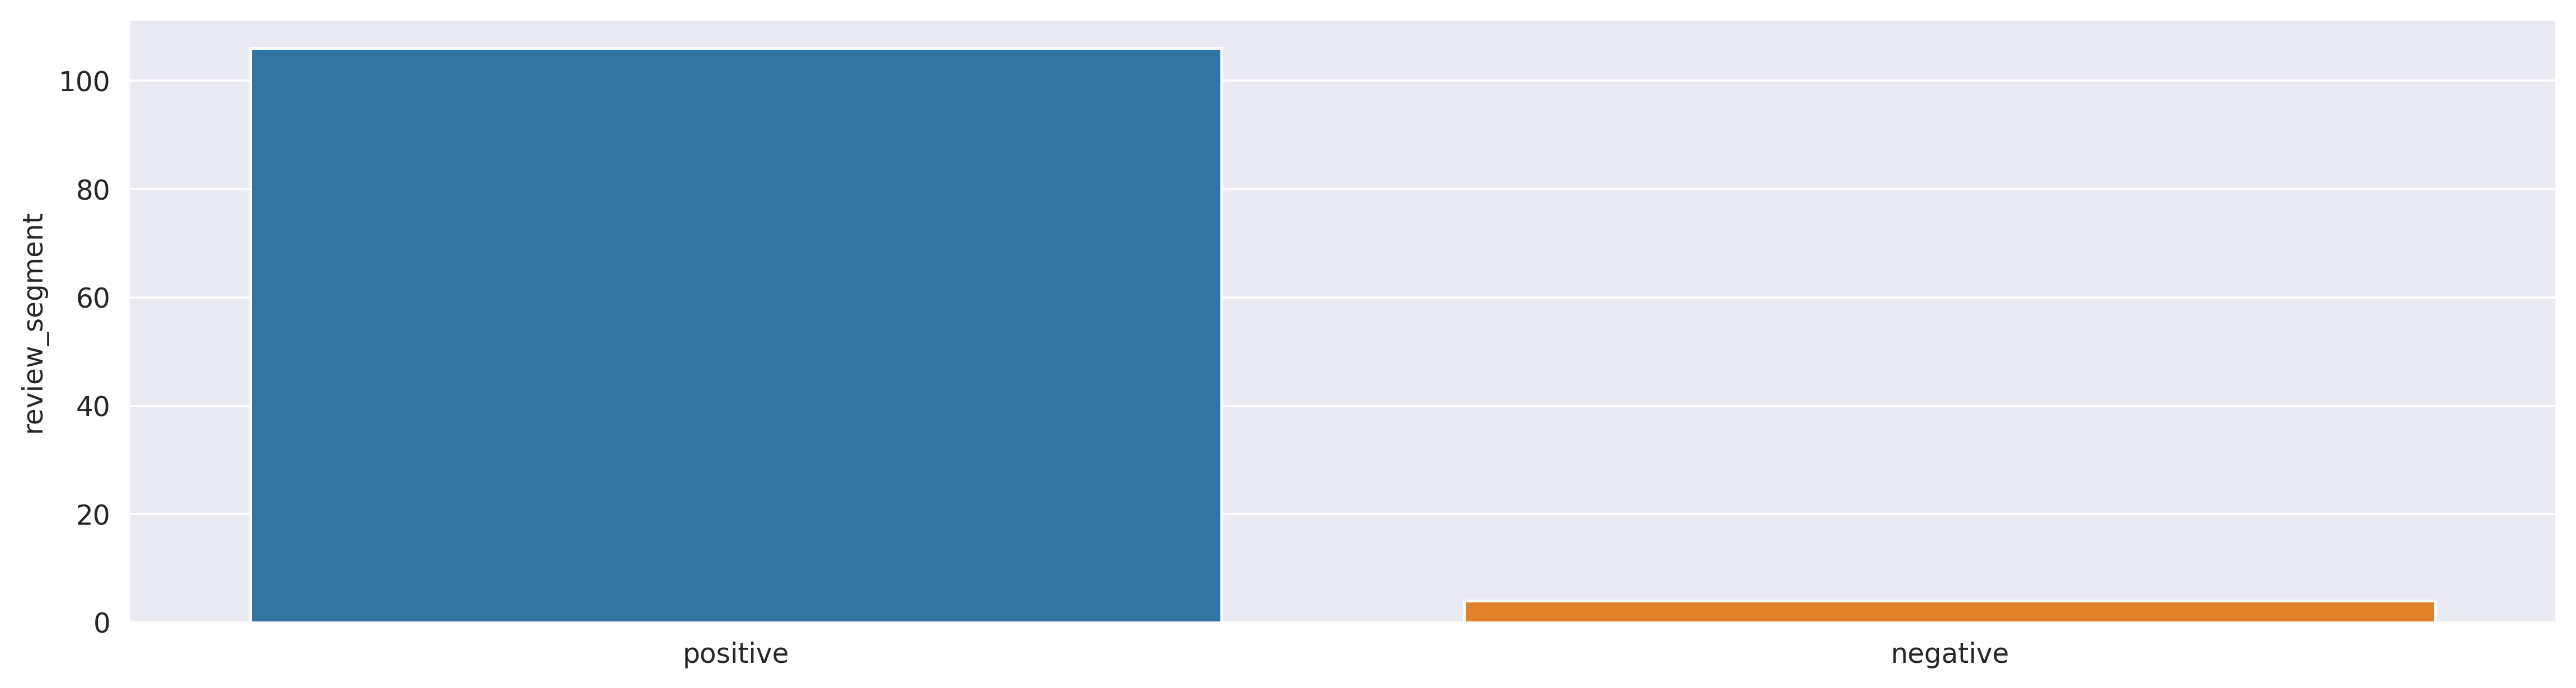

In [56]:
sns.barplot(x =df_corpus['review_segment'].value_counts().index,y= df_corpus['review_segment'].value_counts())

<Axes: ylabel='review_segment'>

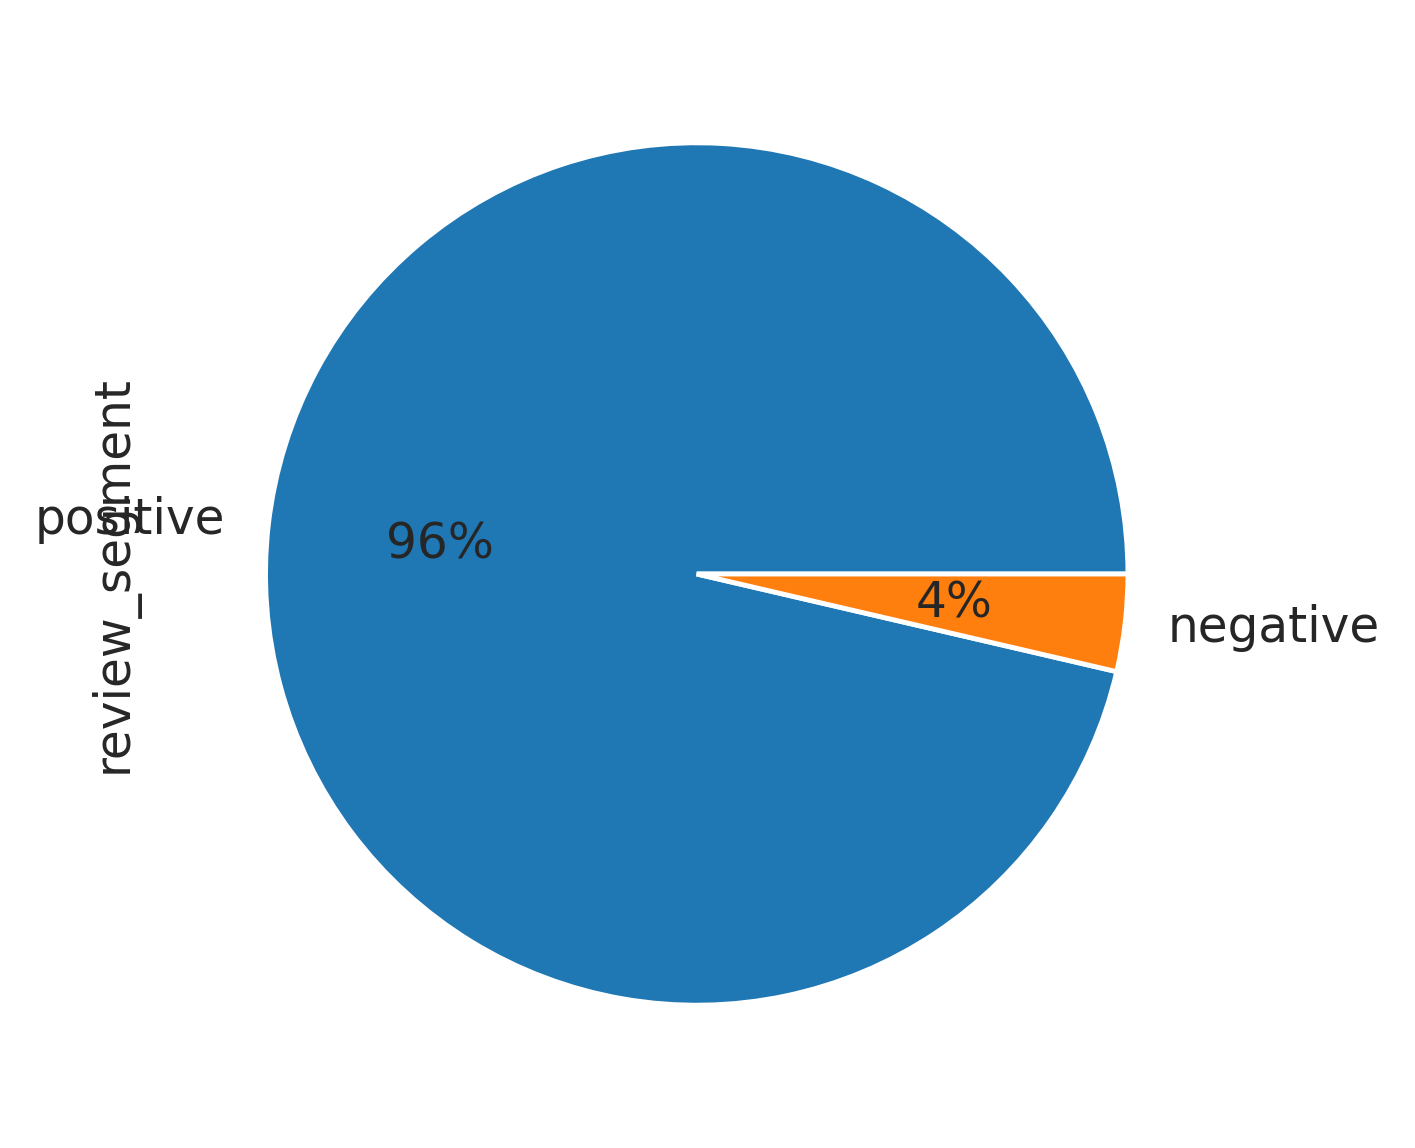

In [57]:
df_corpus['review_segment'].value_counts().plot(kind='pie',autopct='%1.00f%%')